# PAA Project, a.y. 2015/2016
## Average number of checks for Quicksort

Authors:
- Tommaso Papini, 5537529 ([mail][mail-tom] [Github][git-tom])
- Gabriele Bani, 5719258 ([mail][mail-gab] [Github][git-gab])

[mail-tom]: mailto:tommaso.papini1@stud.unifi.it
[git-tom]: https://github.com/oddlord
[mail-gab]: mailto:gabriele.bani@stud.unifi.it
[git-gab]: https://github.com/brnibani


### Introduction
The aim of this notebook is to provide an explanation on how to get the formula to calculate the (exact) average number of checks done by the [Quicksort][quicksort] algorithm on arrays of length $n$.

In particular this notebook will be very [symbolic computation][symb-comp] oriented, which means that most of the passages needed to get to the final form of our formula will be done using a symbolic computation package for [Python][python], called [sympy][sympy].

With sympy we'll be able to rewrite and manipulate our recurrence to finally obtain the goal function that computes the average number of checks, given the array length $n$.

[quicksort]: https://en.wikipedia.org/wiki/Quicksort
[symb-comp]: https://en.wikipedia.org/wiki/Symbolic_computation
[python]: https://www.python.org/
[sympy]: http://www.sympy.org/en/index.html

### Some initial imports
Before with start with the cool stuff, let's first import the basic packages we're gonna need for the rest of the notebook!

In [31]:
import numpy
from sympy import *
from sympy.abc import x, n, z, t, j, k

init_printing()

### Quicksort implementation with checks counting
Here we provide the Quicksort implementation that will be used for the rest of the notebook.

As you might know, the number of checks/swaps might vary greatly from one implementation to another of the same algorithm, so it's mandatory to set in stone right away which specific implementation we're gonna use.

In this implementation the inputs $v$, $l$ and $r$ represents, respectively, the array to be sorted and the left and right indexes of the array.
The pivot is always the rightmost element of the array, i.e. $v[r]$.

Also, we included a checks counting, so that later on we can also run some simulation to gather some actual number to compare with the function output (and check if the results are consistent!).
The algorithm will return the number of checks done $nc$.

In [32]:
def quick(v,l,r):
    nc = 0;
    if (r - l) >= 0:
        p = v[r]
        i = l - 1
        j = r
        while i < j:
            i += 1
            nc += 1
            while v[i] < p:
                i += 1
                nc += 1
            j -= 1
            nc += 1
            while l <= j and p < v[j]:
                j -= 1
                nc += 1
            if i < j:
                a = v[i]
                v[i] = v[j]
                v[j] = a
        a = v[i]
        v[i] = p
        v[r] = a
        nc += quick(v,l,i-1)
        nc += quick(v,i+1,r)
    return nc

### Closed form function
Let's define the closed form of the function we're looking for, just to give a glimpse of what we're doing with a few examples.

The function is
$$C_n = 2(n+1)(H_{n+1}-1),$$
where $C_n$ is the average checks with arrays of length $n$ and $H_{n}$ is the $n$-th [harmonic number][harm-num].

[harm-num]: https://en.wikipedia.org/wiki/Harmonic_number

In [33]:
def checks_quicksort(n):
    return 2*(n+1)*(harmonic(n+1).evalf()-1)

### A couple of examples
We provide here a couple of examples where we compare the result of the closed form function defined above with the actual number of checks done by our implementation of Quicksort on a random array.

In [34]:
random_perm = numpy.random.permutation(20)
print ("Random array: %s" % (random_perm))
checks = quick(random_perm,0,19)
print ("Array after Quicksort: %s" % (random_perm))
print ("Quicksort count: %.5f; closed-form: %.5f" % (checks, checks_quicksort(20)))

Random array: [18  2  0  7  4  3  1  8 11 10 14  6 12 17 13 15 16  9  5 19]
Array after Quicksort: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Quicksort count: 134.00000; closed-form: 111.10507


In [35]:
random_perm = numpy.random.permutation(4)
print ("Random array: %s" % (random_perm))
checks = quick(random_perm,0,3)
print ("Array after Quicksort: %s" % (random_perm))
print ("Quicksort count: %.5f; closed-form: %.5f" % (checks, checks_quicksort(4)))

Random array: [0 1 3 2]
Array after Quicksort: [0 1 2 3]
Quicksort count: 12.00000; closed-form: 12.83333


### Main recurrence
Let the dance commence!

The first thing we need is to define a recurrence that describes the average number of checks done by our Quicksort implementations.

Why a recurrence, you might ask? because the Quicksort is a recursive algorithm and recurrences are the mathematical counterpart of recursive algorithms: a recursive algorithm is described by a recurrence and a recurrence can be evaluated by running a recursive algorithm.

But evaluating a recurrence can be sometimes very expensive, in terms of both space and time. So what we usually try to do is to **solve** the recurrence, which means try to rewrite and manipulate the recurrence until we obtain a closed form.
Since the closed form is more direct and does not involve calling the same function over and over multiple times, it's often preferrable to the recurrence evaluation as it'll save precious resources.

To obtain the closed form of the recurrence that describes the checks in the Quicksort is the goal of this notebook.
In particular we'll see two different approaches to get from the recurrence to the closed form: the *difference method* and the *genetaring function method*.

#### Getting the recurrence
So let's start with defining the recurrence that describes the average number of checks done by our Quicksort implementation.

How many checks does a single Quicksort call do?
$$n+1$$
In fact we can notice that our algorithm does a check each time the indexes $i$ and $j$ are increased/decreased. Since these indexes have to scan all the elements that are not the pivot until they cross, we have $n-1$ checks (for $n-1$ elements that are not the pivot) plus $2$ checks to let the indexes cross, for a total of $n+1$.

Now we have to consider the checks done by the two recursive calls.
If the pivot is $k$, then the checks of the two calls will be given by
$$C_{k-1}+C_{n-k}$$

But since we're analyzing the average number of checks, we have to consider every possible configuration we can find. The number of checks done by the two recursive calls depends on the value of the pivot, i.e. the rightmost element, that can have $n$ different values (from $1$ to $n$).

Also, among the $n!$ possible permutations, only $(n-1)!$ have $k$ in the last position. This means that the probability of having a combination with $k$ as pivot is:
$$\frac{(n-1)!}{n!}=\frac{1}{n}$$

If we put everything together we finally obtain the recurrence:
$$C_n = n+1+\frac{1}{n}\sum_{k=1}^{n}(C_{k-1}+C_{n-k})$$
With initial contition $C_0 = 0$.

Before we can mov on to the next step, we can notice that inside the summation, each recursive call appears exactly twice and also that the actual indexes of the recursive calls range from $0$ to $n-1$. This means that:
$$\sum_{k=1}^{n}(C_{k-1}+C_{n-k}) = 2\sum_{k=0}^{n-1}C_k$$

That said, we can rewrite the recurrence in a much simpler way:
$$C_n = n+1 + \frac{2}{n}\sum_{k=0}^{n-1}C_k$$

#### Python version
Below we provide a python implementation of the above recurrence, so that we can later compare it with the results of the closed form function and the actual checks from the algoritms.

In [36]:
def C_py(n):
    if n == 0:
        return 0
    else:
        Cn = 0.0
        for k in range(0, n):
            Cn += C_py(k)
        return n+1+(2.0/n)*Cn
random_perm = numpy.random.permutation(20)
import timeit
start1 = timeit.default_timer()
quicksort_count = quick(random_perm,0,19)
stop1 = timeit.default_timer()
start2 = timeit.default_timer()
checks = checks_quicksort(20)
stop2 = timeit.default_timer()
start3 = timeit.default_timer()
rec_quicksort = C_py(20)
stop3 = timeit.default_timer()
print ("Quicksort count: %.5f; closed-form: %.5f; recurrence: %.5f" % (quicksort_count, checks, rec_quicksort))
print ("Time Quicksort count: %.5f s; Time closed-form: %.5f s; Time recurrence: %.5f s" % (stop1 - start1,stop2 - start2,
                                                                                                                stop3-start3))

Quicksort count: 112.00000; closed-form: 111.10507; recurrence: 111.10507
Time Quicksort count: 0.00033 s; Time closed-form: 0.00055 s; Time recurrence: 0.40983 s


#### sympy version
Let's start using sympy, the python package for symbolic computation.

We start by defining the recurrence as seen above, in sympy sintax.

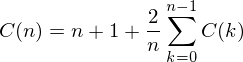

In [37]:
C_fun = Function('C')
base_rec = Eq(C_fun(n), n+1+(2/n)*Sum(C_fun(k), (k, 0, n-1)))
base_rec

#### Are we lucky?
sympy provides a function called *rsolve*, which tries to automatically solve a recurrence and calculate it's closed form.

Let's try to see if are lucky and our recurrence is easy enough to be solved automatically by sympy.

In [38]:
print (rsolve(base_rec, C_fun(n), {C_fun(0):0}))

None


Nope... :(

So let's begin with the first approach, the *difference method*.

### Recurrence solving (difference method)

#### Auxiliary function to apply the same operation to a number and two sided of an Eq

In [39]:
def do_both(eq, n, op):
    return Eq(op(eq.lhs, n), op(eq.rhs, n))

#### Multiply by n both sides

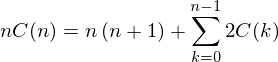

In [40]:
base_rec2 = do_both(base_rec, n, lambda x,y: x*y).simplify()
base_rec2

#### The above is valid forall $n$, so it's valid for $n-1$ as well

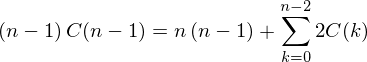

In [41]:
base_rec2_prev = base_rec2.subs(n, n-1).simplify()
base_rec2_prev

#### Auxiliary function to apply an operation to two Eqs sidewise

In [42]:
def do_eqs(eq1, eq2, op):
    return Eq(op(eq1.lhs, eq2.lhs), op(eq1.rhs, eq2.rhs))

#### Application of the difference method

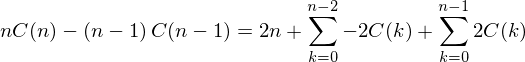

In [43]:
diff_rec = do_eqs(base_rec2, base_rec2_prev, lambda x,y: x-y).simplify()
diff_rec

#### Auxiliary function to extract the last term of a summation and substitute inside an Eq

In [44]:
def extract_last_term_subs(eq, old_sum):
    sum_args = old_sum.args
    f = sum_args[0]
    indexes = sum_args[1]
    new_sum = Sum(f, (indexes[0], indexes[1], indexes[2]-1)) + f.subs(indexes[0], indexes[2])
    return eq.subs(old_sum, new_sum)

#### Extract term $n-1$ and simplify summations

In [45]:
diff_rec2 = extract_last_term_subs(diff_rec, Sum(2*C_fun(k), (k, 0, n-1))).simplify().doit()
diff_rec2

#### Move $(n-1)C(n-1)$ to the other side and group by $C(n-1)$

In [46]:
new_rec = do_both(diff_rec2, (n-1)*C_fun(n-1), lambda x,y: x+y).simplify().factor(C_fun(n-1))
new_rec

#### Divide both sides by $n(n-1)$

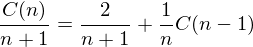

In [47]:
div_rec  = apart(do_both(new_rec, n*(n+1), lambda x,y: x/y), C_fun(n-1))
div_rec

#### Let's iterate!

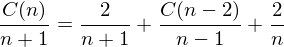

In [48]:
div_rec2 = div_rec.subs(C_fun(n-1)/n, div_rec.subs(n, n-1).rhs)
div_rec2

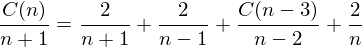

In [49]:
div_rec3 = div_rec2.subs(C_fun(n-2)/(n-1), div_rec.subs(n, n-2).rhs)
div_rec3

#### All the way to $C(0)$ //check if it's correct (there's no other way?)

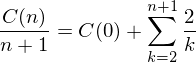

In [50]:
div_rec_final = Eq(div_rec.lhs, Sum(2/k, (k, 2, n+1))+C_fun(0)/(n-n+1))
div_rec_final

#### But $C(0)=0$ (initial condition)

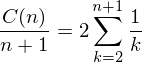

In [51]:
div_rec_final2 = div_rec_final.subs(C_fun(0), 0).factor()
div_rec_final2

#### Auxiliary function to add a missing first term in a summation and substitute inside an Eq

In [52]:
def add_missing_first_term_subs(eq, old_sum):
    sum_args = old_sum.args
    f = sum_args[0]
    indexes = sum_args[1]
    new_sum = Sum(f, (indexes[0], indexes[1]-1, indexes[2])) - f.subs(indexes[0], indexes[1]-1)
    return eq.subs(old_sum, new_sum)

#### Let's add the missing first term to the summation above

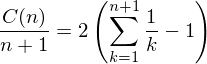

In [53]:
div_rec_final3 = add_missing_first_term_subs(div_rec_final2, Sum(1/k, (k, 2, n+1))).factor()
div_rec_final3

#### That summation above is the harmonic series! //subs is so ugly! we need some rewrite magic here! 

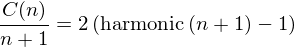

In [54]:
div_rec_final_harm = div_rec_final3.subs(Sum(1/k, (k, 1, n+1)),harmonic(n+1)).factor()
div_rec_final_harm

#### Let's finally obtain the closed form by multiplying both sides by $(n+1)$

In [55]:
closed_form = do_both(div_rec_final_harm,n+1,lambda x,y: x*y).factor()
closed_form

### Recurrence solving (generating function method)

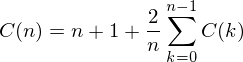

In [56]:
base_rec

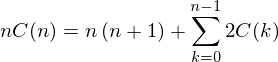

In [57]:
base_rec2

In [58]:
G = Function('\mathcal{G}');
a = indexed.IndexedBase('a')
G(a[n])

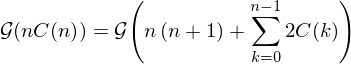

In [59]:
def identity_principle(eq):
    return Eq(G(eq.lhs), G(eq.rhs))
g_rec = identity_principle(base_rec2)
g_rec

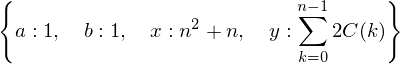

In [64]:
x = Wild('x')
a = Wild('a')
y = Wild('y')
b = Wild('b')
def linearity(eq, g):
    match = g.match(G(x*a+y*b))
    return match
linearity(g_rec, g_rec.rhs)